# 3 Exploratory Data Analysis

## 3.1 Contents

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Missing Values](#3.5.1_Missing_Values)
      * [3.5.1.1 Total Charges missing values](#3.5.1.1_Total_Charges)
          * [3.5.1.1.1 Replace missing values](#3.5.1.1.1_Replace)
    * [3.5.2 Duplicate Values](#3.5.2_Duplicate_Values)
    * [3.5.3 Define the target variable](#3.5.3_Target_Values)
    * [3.5.4 Delete CustomerID column](#3.5.4_CustomerID)
    * [3.5.5 Summary of Categorical Features](#3.5.5_Categorical)
  * [3.6 Data Visualization](#3.6_Visualization)
    * [3.6.1 Distribution of Churn](#3.6.1_ChurnDistribution)
    * [3.6.2 Distribution of numerical variables](#3.6.2_Distribution)
    * [3.6.3 Churn vs other columns](#3.6.3_Churn_vs)
    * [3.6.4 Monthly Charges Distribution by Contract Type](#3.6.4_Monthly)
    * [3.6.5 Pairplot for a subset of features](#3.6.5_Pairplot)
    * [3.6.6 Heatmap](#3.6.6_Heatmap)
  * [3.7 Summary](#3.7_Summary)

## 3.2 Introduction

This notebook provides a comprehensive exploratory data analysis (EDA) of the Amazon Fine Food Reviews dataset. The analysis aims to uncover key patterns and insights that reflect customer sentiment and preferences regarding fine food products on Amazon. By examining various features such as review text, ratings, helpfulness scores, and reviewer profiles, this notebook helps understand the factors that influence customer reviews. The goal is to leverage this data to provide actionable insights into customer behavior and improve product offerings and customer service strategies.

## 3.3 Imports

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3
import nltk

## 3.4 Load The Data

In [2]:
amazon_data = pd.read_csv("amazon_data_cleaned.csv")
amazon_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,ReviewTime,CleanedText,CleanedSummary,TokenizedText,TokenizedSummary,LemmatizedText,LemmatizedSummary
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,2011-04-27,i have bought several of the vitality canned d...,good quality dog food,"['bought', 'several', 'vitality', 'canned', 'd...","['good', 'quality', 'dog', 'food']","['bought', 'several', 'vitality', 'canned', 'd...","['good', 'quality', 'dog', 'food']"
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,2012-09-07,product arrived labeled as jumbo salted peanut...,not as advertised,"['product', 'arrived', 'labeled', 'jumbo', 'sa...",['advertised'],"['product', 'arrived', 'labeled', 'jumbo', 'sa...",['advertised']
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,2008-08-18,this is a confection that has been around a fe...,delight says it all,"['confection', 'around', 'centuries', 'light',...","['delight', 'says']","['confection', 'around', 'century', 'light', '...","['delight', 'say']"
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,2011-06-13,if you are looking for the secret ingredient i...,cough medicine,"['looking', 'secret', 'ingredient', 'robitussi...","['cough', 'medicine']","['looking', 'secret', 'ingredient', 'robitussi...","['cough', 'medicine']"
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0,2012-10-21,great taffy at a great price there was a wide ...,great taffy,"['great', 'taffy', 'great', 'price', 'wide', '...","['great', 'taffy']","['great', 'taffy', 'great', 'price', 'wide', '...","['great', 'taffy']"


In [3]:
# Check the shape of the DataFrame
print(amazon_data.shape)

(568454, 18)


In [4]:
# Summary of the DataFrame
print(amazon_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      568454 non-null  int64  
 1   ProductId               568454 non-null  object 
 2   UserId                  568454 non-null  object 
 3   ProfileName             568438 non-null  object 
 4   HelpfulnessNumerator    568454 non-null  int64  
 5   HelpfulnessDenominator  568454 non-null  int64  
 6   Score                   568454 non-null  int64  
 7   Time                    568454 non-null  int64  
 8   Summary                 568427 non-null  object 
 9   Text                    568454 non-null  object 
 10  HelpfulnessRatio        568454 non-null  float64
 11  ReviewTime              568454 non-null  object 
 12  CleanedText             568453 non-null  object 
 13  CleanedSummary          568250 non-null  object 
 14  TokenizedText       

In [5]:
# Check for missing values
missing_values = amazon_data.isnull().sum()
print(missing_values)

Id                          0
ProductId                   0
UserId                      0
ProfileName                16
HelpfulnessNumerator        0
HelpfulnessDenominator      0
Score                       0
Time                        0
Summary                    27
Text                        0
HelpfulnessRatio            0
ReviewTime                  0
CleanedText                 1
CleanedSummary            204
TokenizedText               0
TokenizedSummary            0
LemmatizedText              0
LemmatizedSummary           0
dtype: int64


## 3.5 Explore The Data

### 3.5.1 ProductId

In [6]:
amazon_data.ProductId.value_counts(ascending=False)

B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
             ... 
B004DSPTTM      1
B008C9QWU8      1
B007O5A6BM      1
B003Q4TZ08      1
B001LR2CU2      1
Name: ProductId, Length: 74258, dtype: int64

In [7]:
amazon_data[amazon_data['ProductId'] == 'B007JFMH8M'].head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,ReviewTime,CleanedText,CleanedSummary,TokenizedText,TokenizedSummary,LemmatizedText,LemmatizedSummary
562970,562971,B007JFMH8M,A368Z46FIKHSEZ,"jaimoi ""Appreciator of good music""",0,0,5,1343433600,Delicious!,I love these cookies! Not only are they healt...,0.0,2012-07-28,i love these cookies not only are they healthy...,delicious,"['love', 'cookies', 'healthy', 'taste', 'great...",['delicious'],"['love', 'cooky', 'healthy', 'taste', 'great',...",['delicious']
562971,562972,B007JFMH8M,A1JAPP1CXRG57A,"Linda Painchaud-Steinman ""PARK EDGE BOOKS""",0,0,5,1343433600,Great Anytime of Day!,Quaker Soft Baked Oatmeal Cookies with raisins...,0.0,2012-07-28,quaker soft baked oatmeal cookies with raisins...,great anytime of day,"['quaker', 'soft', 'baked', 'oatmeal', 'cookie...","['great', 'anytime', 'day']","['quaker', 'soft', 'baked', 'oatmeal', 'cooky'...","['great', 'anytime', 'day']"
562972,562973,B007JFMH8M,A2Z9JNXPIEL2B9,carwash169,0,0,5,1343433600,Very good!,I am usually not a huge fan of oatmeal cookies...,0.0,2012-07-28,i am usually not a huge fan of oatmeal cookies...,very good,"['usually', 'huge', 'fan', 'oatmeal', 'cookies...",['good'],"['usually', 'huge', 'fan', 'oatmeal', 'cooky',...",['good']
562973,562974,B007JFMH8M,A31CYJQO3FL586,"P. Titus ""Knitgirlll""",0,0,5,1343433600,Quaker Oats Oatmeal Raisin Mom Voxbox Review C...,I participated in a product review that includ...,0.0,2012-07-28,i participated in a product review that includ...,quaker oats oatmeal raisin mom voxbox review c...,"['participated', 'product', 'review', 'include...","['quaker', 'oats', 'oatmeal', 'raisin', 'mom',...","['participated', 'product', 'review', 'include...","['quaker', 'oat', 'oatmeal', 'raisin', 'mom', ..."
562974,562975,B007JFMH8M,A2KXQ2EKFF3K2G,Jessica,0,0,5,1343433600,"Quick, simple HEALTHY snack for the kiddos!!!",My kids loved these. I was very pleased to giv...,0.0,2012-07-28,my kids loved these i was very pleased to give...,quick simple healthy snack for the kiddos,"['kids', 'loved', 'pleased', 'give', 'kids', '...","['quick', 'simple', 'healthy', 'snack', 'kiddos']","['kid', 'loved', 'pleased', 'give', 'kid', 'qu...","['quick', 'simple', 'healthy', 'snack', 'kiddos']"


In [8]:
# Filtering the dataset for the specific ProductId and computing the median of the 'Score' column
median_score = amazon_data[amazon_data['ProductId'] == 'B007JFMH8M']['Score'].median()
print(median_score)

5.0


The most frequently purchased product associated with ' Baked Oatmeal Cookies' has achieved a median score of 5.

In [9]:
amazon_data[amazon_data['ProductId'] == 'B0026RQTGE'].head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,ReviewTime,CleanedText,CleanedSummary,TokenizedText,TokenizedSummary,LemmatizedText,LemmatizedSummary
74631,74632,B0026RQTGE,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,1318896000,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,1.0,2011-10-18,my year old sheltie has chronic brochotitis be...,addictive but works for night coughing in dogs,"['year', 'old', 'sheltie', 'chronic', 'brochot...","['addictive', 'works', 'night', 'coughing', 'd...","['year', 'old', 'sheltie', 'chronic', 'brochot...","['addictive', 'work', 'night', 'coughing', 'dog']"
74632,74633,B0026RQTGE,A17TDUBB4Z1PEC,jaded_green,1,1,5,1318550400,genuine Greenies best price,"These are genuine Greenies product, not a knoc...",1.0,2011-10-14,these are genuine greenies product not a knock...,genuine greenies best price,"['genuine', 'greenies', 'product', 'knockoff',...","['genuine', 'greenies', 'best', 'price']","['genuine', 'greenies', 'product', 'knockoff',...","['genuine', 'greenies', 'best', 'price']"
74633,74634,B0026RQTGE,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1317168000,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d...",1.0,2011-09-28,our dogs love greenies but of course which dog...,perfect for our little doggies,"['dogs', 'love', 'greenies', 'course', 'doggie...","['perfect', 'little', 'doggies']","['dog', 'love', 'greenies', 'course', 'doggy',...","['perfect', 'little', 'doggy']"
74634,74635,B0026RQTGE,AVTY5M74VA1BJ,tarotqueen,1,1,5,1316822400,dogs love greenies,"What can I say, dogs love greenies. They begg ...",1.0,2011-09-24,what can i say dogs love greenies they begg fo...,dogs love greenies,"['say', 'dogs', 'love', 'greenies', 'begg', 't...","['dogs', 'love', 'greenies']","['say', 'dog', 'love', 'greenies', 'begg', 'ti...","['dog', 'love', 'greenies']"
74635,74636,B0026RQTGE,A13TNN54ZEAUB1,dcz2221,1,1,5,1316736000,Greenies review,This review is for a box of Greenies Lite for ...,1.0,2011-09-23,this review is for a box of greenies lite for ...,greenies review,"['review', 'box', 'greenies', 'lite', 'dog', '...","['greenies', 'review']","['review', 'box', 'greenies', 'lite', 'dog', '...","['greenies', 'review']"


In [10]:
# Filtering the dataset for the specific ProductId and computing the median of the 'Score' column
median_score = amazon_data[amazon_data['ProductId'] == 'B0026RQTGE']['Score'].median()
print(median_score)

5.0


The second most frequently purchased product associated with 'Greenies dog food' has achieved a median score of 5.

In [11]:
amazon_data[amazon_data['ProductId'] == 'B002QWHJOU'].head() 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,ReviewTime,CleanedText,CleanedSummary,TokenizedText,TokenizedSummary,LemmatizedText,LemmatizedSummary
329412,329413,B002QWHJOU,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,1318896000,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,1.0,2011-10-18,my year old sheltie has chronic brochotitis be...,addictive but works for night coughing in dogs,"['year', 'old', 'sheltie', 'chronic', 'brochot...","['addictive', 'works', 'night', 'coughing', 'd...","['year', 'old', 'sheltie', 'chronic', 'brochot...","['addictive', 'work', 'night', 'coughing', 'dog']"
329413,329414,B002QWHJOU,A17TDUBB4Z1PEC,jaded_green,1,1,5,1318550400,genuine Greenies best price,"These are genuine Greenies product, not a knoc...",1.0,2011-10-14,these are genuine greenies product not a knock...,genuine greenies best price,"['genuine', 'greenies', 'product', 'knockoff',...","['genuine', 'greenies', 'best', 'price']","['genuine', 'greenies', 'product', 'knockoff',...","['genuine', 'greenies', 'best', 'price']"
329414,329415,B002QWHJOU,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1317168000,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d...",1.0,2011-09-28,our dogs love greenies but of course which dog...,perfect for our little doggies,"['dogs', 'love', 'greenies', 'course', 'doggie...","['perfect', 'little', 'doggies']","['dog', 'love', 'greenies', 'course', 'doggy',...","['perfect', 'little', 'doggy']"
329415,329416,B002QWHJOU,AVTY5M74VA1BJ,tarotqueen,1,1,5,1316822400,dogs love greenies,"What can I say, dogs love greenies. They begg ...",1.0,2011-09-24,what can i say dogs love greenies they begg fo...,dogs love greenies,"['say', 'dogs', 'love', 'greenies', 'begg', 't...","['dogs', 'love', 'greenies']","['say', 'dog', 'love', 'greenies', 'begg', 'ti...","['dog', 'love', 'greenies']"
329416,329417,B002QWHJOU,A13TNN54ZEAUB1,dcz2221,1,1,5,1316736000,Greenies review,This review is for a box of Greenies Lite for ...,1.0,2011-09-23,this review is for a box of greenies lite for ...,greenies review,"['review', 'box', 'greenies', 'lite', 'dog', '...","['greenies', 'review']","['review', 'box', 'greenies', 'lite', 'dog', '...","['greenies', 'review']"


In [12]:
# Filtering the dataset for the specific ProductId and computing the median of the 'Score' column
median_score = amazon_data[amazon_data['ProductId'] == 'B002QWHJOU']['Score'].median()
print(median_score)

5.0


The third most frequently purchased product associated with 'Greenies dog food' has achieved a median score of 5.

### 3.5.2 ProfileName

In [13]:
amazon_data.ProfileName.value_counts(ascending=False)

C. F. Hill "CFH"                               451
O. Brown "Ms. O. Khannah-Brown"                421
Gary Peterson                                  389
Rebecca of Amazon "The Rebecca Review"         365
Chris                                          363
                                              ... 
Steven Wolff                                     1
joycomeau                                        1
Lizz                                             1
Phyllis A. De Smet-Howard "tweedsmerewillo"      1
srfell17                                         1
Name: ProfileName, Length: 218416, dtype: int64

Here is the list of customers with the most reviews: C. F. Hill ("CFH"), O. Brown ("Ms. O. Khannah-Brown"), Gary Peterson, Rebecca of Amazon ("The Rebecca Review"), and Chris.

## 3.5.3 Score

In [14]:
amazon_data.Score.value_counts(ascending=False)

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

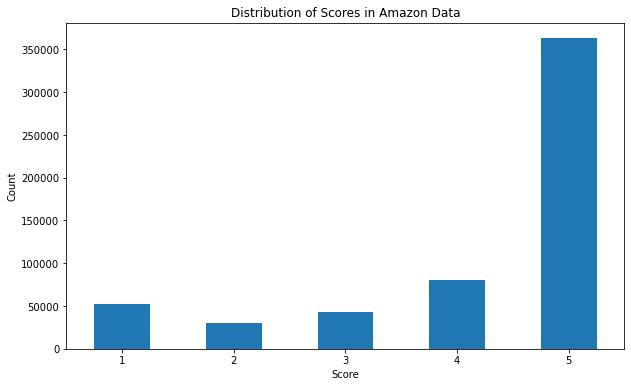

In [15]:
# Calculate the value counts for the 'Score' column
score_counts = amazon_data['Score'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar')
plt.title('Distribution of Scores in Amazon Data')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The bar chart illustrates the distribution of scores in the Amazon Fine Food Reviews dataset, showing a majority of high ratings with most reviews scoring 5, indicating overall customer satisfaction. Lower scores are significantly less frequent, highlighting that a smaller proportion of customers are dissatisfied.

## 3.5.3 ReviewTime

In [16]:
amazon_data.ReviewTime.value_counts(ascending=False)

2012-10-16    1143
2011-11-25    1088
2011-11-28    1070
2012-09-06    1018
2012-08-06     989
              ... 
2004-09-20       1
2004-12-10       1
2004-03-26       1
2004-06-20       1
2003-11-25       1
Name: ReviewTime, Length: 3168, dtype: int64

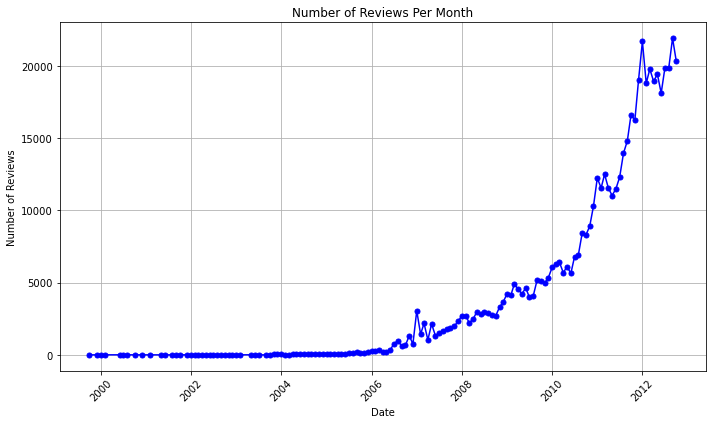

In [17]:
# Ensure the 'ReviewTime' column is in datetime format
amazon_data['ReviewTime'] = pd.to_datetime(amazon_data['Time'], unit='s')

# Group the data by month and count the number of reviews per month
review_counts_monthly = amazon_data.groupby(amazon_data['ReviewTime'].dt.to_period('M')).size()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(review_counts_monthly.index.to_timestamp(), review_counts_monthly.values, marker='o', color='b', markersize=5)
plt.title('Number of Reviews Per Month')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.5.4 UserID, ProductId, and ReviewTime

In [18]:
# Ensure the 'ReviewTime' column is in datetime format
amazon_data['ReviewTime'] = pd.to_datetime(amazon_data['Time'], unit='s')

# Group by 'ProductId', 'ProfileName', and 'ReviewTime', then count the number of reviews for each user for each product on each day
user_product_day_review_counts = amazon_data.groupby(['ProductId', 'ProfileName', amazon_data['ReviewTime'].dt.date]).size().reset_index(name='ReviewCount')

# Identify the user who wrote the most reviews for each product on each day
top_user_per_product_day = user_product_day_review_counts.loc[user_product_day_review_counts.groupby(['ProductId', 'ReviewTime'])['ReviewCount'].idxmax()]

# Order the result based on ReviewCount in descending order
top_user_per_product_day_sorted = top_user_per_product_day.sort_values(by='ReviewCount', ascending=False)

# Print the result
print(top_user_per_product_day_sorted[top_user_per_product_day_sorted['ReviewCount'] > 2 ])

         ProductId          ProfileName  ReviewTime  ReviewCount
178318  B000WFU8O6                 HTBK  2010-07-04           11
177433  B000WFORH0                 HTBK  2010-07-04           11
176828  B000WFKWDI                 HTBK  2010-07-04           11
177888  B000WFRQQ4                 HTBK  2010-07-04           11
176640  B000WFKI82                 HTBK  2010-07-04           11
...            ...                  ...         ...          ...
411438  B003TC7WN4  William Jens Jensen  2011-07-05            3
357480  B002R8SLUY     J "Mom of twins"  2010-01-07            3
371813  B0030VJ818          Amy Livings  2011-04-13            3
136372  B000LKZD4W                Light  2009-04-20            3
526181  B006NGE15U           Pixie Rose  2011-07-24            3

[601 rows x 4 columns]


This result is useful for analyzing review patterns, identifying potential duplicate reviews, and understanding user behavior over time. The repeated reviews on the same day by the same user could indicate **spam or fraudulent activity**, which is critical for ensuring data quality and integrity in further analysis. For example, "HTBK" provided 11 reviews for several products (such as 'B000WFU8O6', 'B000WFORH0', 'B000WFKWDI', 'B000WFRQQ4', and 'B000WFKI82') on the same day.

#### 3.4.5.1 Potantial spam profiles

In [19]:
# Assuming top_user_per_product_day_sorted is already defined and sorted as per the previous steps
top_user_profiles = top_user_per_product_day_sorted[top_user_per_product_day_sorted['ReviewCount'] > 3 ]['ProfileName'].unique()

# Print the results
top_user_profiles

array(['HTBK', 'christopher hayes', 'Paul Moskowitz',
       'N. Ferguson "Two, Daisy, Hannah, and Kitten"',
       'Nicholas Walker "Savage"', 'J. Hollister "Judy says"',
       'Joe MacBu', 'Bballdude733', 'busybakers', 'FL Mom', 'Doctor D',
       'Wendy Johnston "podlogic"', 'Melissa-Kae Leacock',
       'B.O.B  AOJN "would be gourmet"', 'CatWoman',
       'Shana "That\'s my opinion- I could be wrong!"', 'Basil Nestor',
       'A. Winters "Be good humans."', 'ARA', 'A. Smith', 'Mark Bodzin',
       'Zefran', 'Sandy "WR Gma"', 'mom of 2', 'GMG "GMG"', 'Orlando Mom'],
      dtype=object)

In [20]:
top_user_profiles.shape

(26,)

The code identifies top user profiles who have written more than three reviews in a single day for the same product. This filtering helps in recognizing highly active users who may **potentially be providing fake feedback**. The resulting list of profile names can be further analyzed to evaluate their review patterns, thereby ensuring the integrity and quality of the dataset.

#### 3.4.5.2 Products associated with potantial spam profiles

In [21]:
ProfileNames = ['HTBK', 'christopher hayes', 'Paul Moskowitz',
       'N. Ferguson "Two, Daisy, Hannah, and Kitten"',
       'Nicholas Walker "Savage"', 'J. Hollister "Judy says"',
       'Joe MacBu', 'Bballdude733', 'busybakers', 'FL Mom', 'Doctor D',
       'Wendy Johnston "podlogic"', 'Melissa-Kae Leacock',
       'B.O.B  AOJN "would be gourmet"', 'CatWoman',
       'Shana "That\'s my opinion- I could be wrong!"', 'Basil Nestor',
       'A. Winters "Be good humans."', 'ARA', 'A. Smith', 'Mark Bodzin',
       'Zefran', 'Sandy "WR Gma"', 'mom of 2', 'GMG "GMG"', 'Orlando Mom']

# Use .isin() to filter the DataFrame based on the ProfileNames list
products = amazon_data[amazon_data['ProfileName'].isin(ProfileNames)]['ProductId'].unique()

# Print the scores
print(products)

['B000E7WM0K' 'B0002Z9BF8' 'B0016FY6H6' 'B0002TJAZK' 'B0025UALB6'
 'B002TMV3E4' 'B001CGTN1I' 'B005HB4HGU' 'B002TMV34E' 'B002OFZIV0'
 'B000BHREYW' 'B0045XE32E' 'B000255OIG' 'B0030VBRIU' 'B000CMFVY6'
 'B001BDDTB2' 'B004K6B09U' 'B004ZIER34' 'B000YSS7EO' 'B000E671W0'
 'B000MXTK2Y' 'B002ZOCEOY' 'B000V9PH4O' 'B0016FRI8A' 'B001E5DXEU'
 'B00106TG9Y' 'B002DLXXHG' 'B000E1DSQS' 'B002L68KDK' 'B001HTJ2BQ'
 'B000LKVDO6' 'B0002I0GVI' 'B000EGZ9AG' 'B001IMUHCU' 'B006Q7YFLQ'
 'B000E39T82' 'B001M09BTS' 'B0031U9VI8' 'B0041NYV8E' 'B000MXWXD2'
 'B000FPM2PG' 'B001EPPV86' 'B001EPPV8Q' 'B000E65OV0' 'B000168O3I'
 'B003ANFMY8' 'B001B02JF2' 'B000UPALKO' 'B004CYLW7A' 'B000EVOSE4'
 'B003XR88YC' 'B001ULH7P4' 'B0034NB6S0' 'B001KUOGAO' 'B000W5SLB8'
 'B001EQ5KTK' 'B0094JPM1K' 'B000EDG598' 'B000FA38ZY' 'B0019ZB4KA'
 'B002IEZJMA' 'B000FPKXK2' 'B000FPJ4M0' 'B0002X8HOQ' 'B0002X8HOG'
 'B000EM8UFG' 'B001EQ55ZO' 'B006ACQY66' 'B009GHI6I6' 'B001L492LW'
 'B0018KR8V0' 'B001E52VLG' 'B007K449CE' 'B0010OST7Q' 'B000LKUAK4'
 'B000EPUP

These product IDs are associated with profiles that exhibited unusual review patterns, such as writing multiple reviews for the same product on a single day or giving uniformly high scores across different products. Many of these products appear to fall under the same category, potentially 'Cat food', suggesting coordinated review manipulation. 

In [22]:
# Assuming top_user_per_product_day_sorted is already defined and sorted as per the previous steps
top_Product_profiles = top_user_per_product_day_sorted[top_user_per_product_day_sorted['ReviewCount'] > 3 ]['ProductId'].unique()

# Print the results
top_Product_profiles

array(['B000WFU8O6', 'B000WFORH0', 'B000WFKWDI', 'B000WFRQQ4',
       'B000WFKI82', 'B00008CQVA', 'B000WFPJIG', 'B000084EZ4',
       'B000WFEN74', 'B000WFN0VO', 'B000WFUL3E', 'B000084DWM',
       'B003BJOORW', 'B003MWBFXY', 'B000QSN7P6', 'B003MWBFMK',
       'B003MW7858', 'B009B87SAC', 'B003M5TG28', 'B0002MLA5K',
       'B001VIYCK4', 'B003M60K54', 'B003ANFMY8', 'B009GHI5Q4',
       'B001VIY8BW', 'B003WK0D8O', 'B003MA8P02', 'B0006345PW',
       'B001BCVY9W', '7310172001', 'B0002DGRQ6', 'B0002DGRRA',
       'B000255OIG', 'B0002DGRSY', 'B0002DGRZC', 'B001BCVY4W',
       'B000FYYOYO', 'B001BDDTB2', 'B001BDDT8K', 'B001B4VOQI',
       'B0002DGRPC', 'B001BCXTGS', 'B003C09PC4', '7310172101',
       'B0029NM8KQ', 'B0029NMDJM', 'B001EO5SCQ', 'B0029NM6NU',
       'B0029NM5YA', 'B0029NIOYU', 'B0029NIPSA', 'B0029NMB6M',
       'B0029NISMI', 'B000MWYAMU', 'B0029NJ2IC', 'B0030VBPN2',
       'B001942GAI', 'B0031UBWLM', 'B001ULH7P4', 'B004GW6O9E',
       'B002CYLV5U', 'B005M16TY8', 'B0030VJ70K', 'B0007

In [23]:
# Print the results
top_Product_profiles.shape

(109,)

The result lists product IDs that are associated with users who have written an unusually high number of reviews in a single day. This behavior may indicate **potential fake reviews**, which can be further investigated to maintain the integrity and quality of the dataset.

#### 3.4.5.3 Scores associated with potantial spam profiles

In [24]:
ProfileNames = ['HTBK', 'christopher hayes', 'Paul Moskowitz',
       'N. Ferguson "Two, Daisy, Hannah, and Kitten"',
       'Nicholas Walker "Savage"', 'J. Hollister "Judy says"',
       'Joe MacBu', 'Bballdude733', 'busybakers', 'FL Mom', 'Doctor D',
       'Wendy Johnston "podlogic"', 'Melissa-Kae Leacock',
       'B.O.B  AOJN "would be gourmet"', 'CatWoman',
       'Shana "That\'s my opinion- I could be wrong!"', 'Basil Nestor',
       'A. Winters "Be good humans."', 'ARA', 'A. Smith', 'Mark Bodzin',
       'Zefran', 'Sandy "WR Gma"', 'mom of 2', 'GMG "GMG"', 'Orlando Mom']

# Use .isin() to filter the DataFrame based on the ProfileNames list
scores = amazon_data[amazon_data['ProfileName'].isin(ProfileNames)]['Score']

# Print the scores
print(scores.value_counts())

5    712
1    284
4    147
3     56
2     38
Name: Score, dtype: int64


In [25]:
ProfileNames = ['HTBK', 'christopher hayes', 'Paul Moskowitz',
       'N. Ferguson "Two, Daisy, Hannah, and Kitten"',
       'Nicholas Walker "Savage"', 'J. Hollister "Judy says"',
       'Joe MacBu', 'Bballdude733', 'busybakers', 'FL Mom', 'Doctor D',
       'Wendy Johnston "podlogic"', 'Melissa-Kae Leacock',
       'B.O.B  AOJN "would be gourmet"', 'CatWoman',
       'Shana "That\'s my opinion- I could be wrong!"', 'Basil Nestor',
       'A. Winters "Be good humans."', 'ARA', 'A. Smith', 'Mark Bodzin',
       'Zefran', 'Sandy "WR Gma"', 'mom of 2', 'GMG "GMG"', 'Orlando Mom']

# Use .isin() to filter the DataFrame based on the ProfileNames list
filtered_data = amazon_data[amazon_data['ProfileName'].isin(ProfileNames)]

# Group by ProfileName and Score, and count the occurrences
grouped_data = filtered_data.groupby(['ProfileName', 'Score']).size().reset_index(name='Count').sort_values(by=['ProfileName', 'Score','Count'], ascending=[True, False, False])

# Print the grouped data
print(grouped_data)


                                     ProfileName  Score  Count
4                                       A. Smith      5     38
3                                       A. Smith      4      3
2                                       A. Smith      3      1
1                                       A. Smith      2      2
0                                       A. Smith      1     10
6                   A. Winters "Be good humans."      5      5
5                   A. Winters "Be good humans."      4     26
7                                            ARA      5      4
9                 B.O.B  AOJN "would be gourmet"      5     16
8                 B.O.B  AOJN "would be gourmet"      4      4
10                                  Basil Nestor      5     11
11                                  Bballdude733      5     18
13                                      CatWoman      5      2
12                                      CatWoman      4     16
16                                      Doctor D      5

#### 3.4.5.4 Summary associated with potantial spam profiles

In [26]:
ProfileNames = ['HTBK', 'christopher hayes', 'Paul Moskowitz',
       'N. Ferguson "Two, Daisy, Hannah, and Kitten"',
       'Nicholas Walker "Savage"', 'J. Hollister "Judy says"',
       'Joe MacBu', 'Bballdude733', 'busybakers', 'FL Mom', 'Doctor D',
       'Wendy Johnston "podlogic"', 'Melissa-Kae Leacock',
       'B.O.B  AOJN "would be gourmet"', 'CatWoman',
       'Shana "That\'s my opinion- I could be wrong!"', 'Basil Nestor',
       'A. Winters "Be good humans."', 'ARA', 'A. Smith', 'Mark Bodzin',
       'Zefran', 'Sandy "WR Gma"', 'mom of 2', 'GMG "GMG"', 'Orlando Mom']

# Use .isin() to filter the DataFrame based on the ProfileNames list
filtered_data = amazon_data[amazon_data['ProfileName'].isin(ProfileNames)]

# Group by ProfileName and Score, and count the occurrences
grouped_data = filtered_data.groupby(['ProductId','Summary', 'Score']).size().reset_index(name='Count').sort_values(by=['Count', 'ProductId', 'Score'], ascending=[False, False, False])

# Print the grouped data
grouped_data.head(28)

,ProductId,Summary,Score,Count
218,B000WFUL3E,Fantastic Food for Good Cat Health,5,11
217,B000WFU8O6,Fantastic Food for Good Cat Health,5,11
216,B000WFRQQ4,Fantastic Food for Good Cat Health,5,11
215,B000WFPJIG,Fantastic Food for Good Cat Health,5,11
214,B000WFORH0,Fantastic Food for Good Cat Health,5,11
213,B000WFN0VO,Fantastic Food for Good Cat Health,5,11
212,B000WFKWDI,Fantastic Food for Good Cat Health,5,11
210,B000WFKI82,Fantastic Food for Good Cat Health,5,11
209,B000WFEN74,Fantastic Food for Good Cat Health,5,11
12,B00008CQVA,Fantastic Food for Good Cat Health,5,11


This pattern suggests potential review manipulation or fake reviews, as identical summaries and scores are unlikely to occur naturally across different products. Additionally, it seems all the products are related to the same category, which appears to be 'Cat food'. 

#### 3.4.5.5 Reviews associated with potantial spam profiles

In [27]:
spam_reviews = amazon_data[amazon_data['ProfileName'].isin(ProfileNames)]

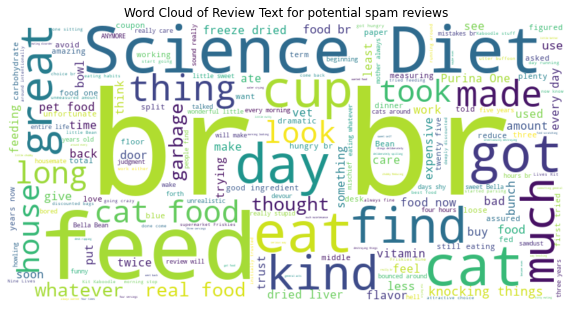

In [28]:
from wordcloud import WordCloud

# Combine all review texts
text_combined = ' '.join(spam_reviews['Text'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text for potential spam reviews')
plt.show()

The attached image shows a word cloud generated from review texts identified as potential spam. Key words such as "feed", "cat", "food", "great", "Science", "Diet", and "find" dominate the word cloud, indicating frequent mentions. These reviews appear to focus on pet food, specifically cat food, with mixed sentiments about product quality. The repetition of words and phrases suggests automated or copied content, which is common in spam reviews. 

#### 3.4.5.4 Filter potanial spam recordes 

In [29]:
amazon_data.shape

(568454, 18)

In [30]:
amazon_data = amazon_data[~amazon_data['ProfileName'].isin(ProfileNames)]

In [31]:
amazon_data.shape

(567217, 18)

### 3.6 Duplicate Records<a id='2.7_Duplicate_Records'></a>

In [32]:
# List of columns to check for duplicates, excluding 'Id'
columns_no_id = [col for col in amazon_data.columns if col != 'Id']

# Check for duplicate records based on all columns except 'Id'
duplicate_records = amazon_data[amazon_data.duplicated(subset=columns_no_id, keep=False)]

In [33]:
amazon_data = amazon_data[~amazon_data.index.isin(duplicate_records.index)]
amazon_data.shape

(566920, 18)

## 3.7 Missing Values

In [34]:
# Check for missing values
missing_values = amazon_data.isnull().sum()
print(missing_values)

Id                          0
ProductId                   0
UserId                      0
ProfileName                16
HelpfulnessNumerator        0
HelpfulnessDenominator      0
Score                       0
Time                        0
Summary                    27
Text                        0
HelpfulnessRatio            0
ReviewTime                  0
CleanedText                 1
CleanedSummary            204
TokenizedText               0
TokenizedSummary            0
LemmatizedText              0
LemmatizedSummary           0
dtype: int64


There are no missing values in the dataset.

## 3.7 Basic Text Statistics

In [35]:
# Calculate basic statistics for the 'Text' column
amazon_data['TextLength'] = amazon_data['Text'].apply(len)
amazon_data['WordCount'] = amazon_data['Text'].apply(lambda x: len(x.split()))

# Display basic statistics
print(amazon_data[['TextLength', 'WordCount']].describe())

          TextLength      WordCount
count  566920.000000  566920.000000
mean      433.810483      79.832484
std       437.354015      77.937214
min        12.000000       3.000000
25%       179.000000      33.000000
50%       301.000000      56.000000
75%       526.000000      98.000000
max     21409.000000    3432.000000


## 3.8 Word Cloud of Review Text

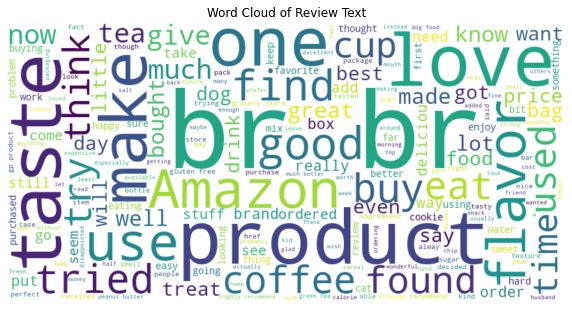

In [36]:
from wordcloud import WordCloud

# Combine all review texts
text_combined = ' '.join(amazon_data['Text'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Plotting the word cloud 
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text')
plt.show()

The word cloud generated from Amazon product reviews highlights key themes and sentiments expressed by customers. Prominent words like "product", "taste", "love", "make", and "buy" indicate a focus on product quality, particularly in terms of taste and flavor. The frequent appearance of positive terms such as "good", "great", and "best" reflects overall customer satisfaction. Additionally, the mention of specific products like "tea", "coffee", and "dog" suggests these categories are commonly reviewed. The word cloud provides valuable insights into customer priorities and sentiments, useful for product improvement and targeted marketing strategies.

## 3.9 Most Common Words

In [ ]:
from collections import Counter
import re

# Function to clean and tokenize text
def clean_tokenize(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = text.split()
    return tokens

# Tokenize all reviews and count words
all_tokens = amazon_data['Text'].apply(clean_tokenize).sum()
word_freq = Counter(all_tokens)

# Display the most common words
print(word_freq.most_common(20))

## 3.10 Sentiment Analysis

In [ ]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
amazon_data['Sentiment'] = amazon_data['Text'].apply(get_sentiment)

# Plotting sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(amazon_data['Sentiment'], bins=50, kde=True)
plt.title('Distribution of Sentiment Polarity in Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

## 3.11 Analysis of Review Length and Score

In [ ]:
# Plotting review length vs. score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='TextLength', data=amazon_data, palette='viridis')
plt.title('Review Length by Score')
plt.xlabel('Score')
plt.ylabel('Review Length')
plt.show()

## 3.12 N-grams Analysis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get n-grams
def get_ngrams(text, n=None):
    vectorizer = CountVectorizer(ngram_range=(n, n)).fit([text])
    return vectorizer.get_feature_names_out()

# Get bi-grams (2-grams)
bigrams = get_ngrams(text_combined, 2)
print(bigrams[:20])

# Get tri-grams (3-grams)
trigrams = get_ngrams(text_combined, 3)
print(trigrams[:20])

In [ ]:
# Save the cleaned data to a new CSV file
amazon_data.to_csv('amazon_data_cleaned.csv', index=False)

## 3.13 Summary